In [19]:
import pandas as pd
import seaborn as sns

In [2]:
import numpy as np

# Task 1

Менеджер виноградного дня утверждает, что 80% клиентов удовлетворены напитком. Мы опросили 100 человек. 75 Довольны. Какой вывод мы можем сделать 

# Гипотеза 1.
Допустим удовлетворенность равна 80%. Какова при этом вероятность получить удовлетворенность 75 и ниже, при выборке 100 человек.

H0: удовлетворенность == 80% 

H1: удовлетворенность < 80% 

In [7]:
np.random.binomial(1, 0.8, size=100).mean()

0.82

In [8]:
np.random.binomial(1, 0.8, size=100).mean() <= 0.75

False

# P - value

In [14]:
np.mean([np.random.binomial(1, 0.8, size=100).mean() <= 0.75 for _ in range(0,10000)])

0.1349

In [15]:
from statsmodels.stats.proportion import proportions_ztest

In [17]:
proportions_ztest(75,100, value=0.8, alternative="smaller")

(-1.1547005383792526, 0.12410653949496159)

<Axes: ylabel='Count'>

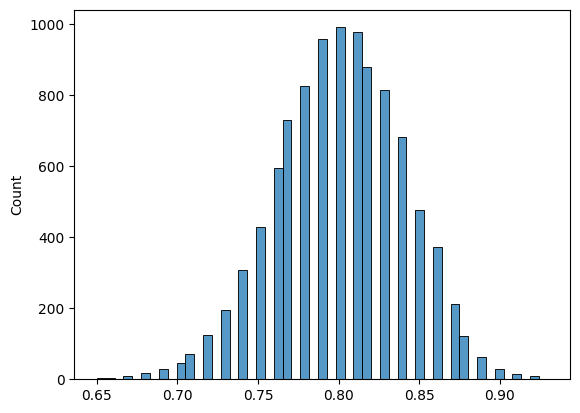

In [21]:
sns.histplot([np.random.binomial(1, 0.8, size=100).mean() for _ in range(0,10000)])

# Гипотеза 2.
Конверсия на текущем лединге составляет 10%, Покажем новый лендинг только 30% клиентов

In [24]:
df = pd.DataFrame({"group":["old landing (A)", "new landing (B)"], "lead":[700, 300], "sale":[70,48]})

In [25]:
df


,group,lead,sale
0,old landing (A),700,70
1,new landing (B),300,48


In [26]:
df["cr"] = df["sale"] / df["lead"]

In [27]:
df

,group,lead,sale,cr
0,old landing (A),700,70,0.10
1,new landing (B),300,48,0.16


Допустим, что никакой разницы нет. Какова вероятность получить такие же или большие различия, при том, что никакой разницы нет?

In [28]:
(70 + 48) / 1000

0.118

In [31]:
np.random.binomial(1, 0.18, size = 700).mean()

0.18857142857142858

In [32]:
np.random.binomial(1, 0.18, size = 300).mean()

0.13666666666666666

In [34]:
np.random.binomial(1, 0.18, size = 300).mean() - np.random.binomial(1, 0.18, size = 700).mean()

0.003809523809523818

In [35]:
df

,group,lead,sale,cr
0,old landing (A),700,70,0.10
1,new landing (B),300,48,0.16


https://www.investopedia.com/terms/t/two-tailed-test.asp

In [38]:
abs(np.random.binomial(1, 0.18, size = 300).mean() 
    - np.random.binomial(1, 0.18, size = 700).mean()) >= 0.16

False

In [49]:
[abs(np.random.binomial(1, 0.118, size = 300).mean() 
    - np.random.binomial(1, 0.118, size = 700).mean()) >= 0.06 for _ in range(10)]

[False, False, False, False, False, False, False, False, True, False]

In [50]:
np.mean(([abs(np.random.binomial(1, 0.118, size = 300).mean() 
    - np.random.binomial(1, 0.118, size = 700).mean()) >= 0.06 for _ in range(1000)]))

0.009

In [51]:
# Link https://www.evanmiller.org/ab-testing/

In [ ]:
df

In [82]:
proportions_ztest([70,48], [700, 300]) # второе значение p (value) 

(-2.695166510284625, 0.007035346384355496)

# Уровень значимость или альфа

0.05 

In [90]:
from tqdm.notebook import tqdm

In [99]:
n = 1000 
result = []
for _ in (range(n)):
    a = np.random.binomial(1, 0.118, size=700).mean()
    b = np.random.binomial(1, 0.118, size=300).mean()
    diff = abs(a-b)

    pval  = np.mean(([abs(np.random.binomial(1, 0.118, size = 300).mean() 
        - np.random.binomial(1, 0.118, size = 700).mean()) >= diff for _ in range(1000)]))

    result.append(pval)

<Axes: ylabel='Count'>

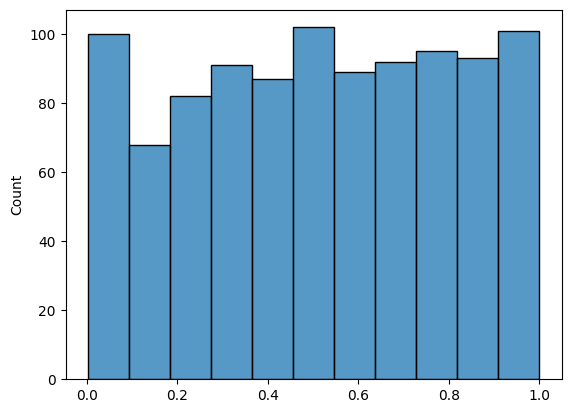

In [100]:
sns.histplot(result)

In [104]:
(np.array(result)< 0.05).mean()

0.054

In [105]:
df = pd.DataFrame(np.random.normal(size=1000))

array([[<Axes: title={'center': '0'}>]], dtype=object)

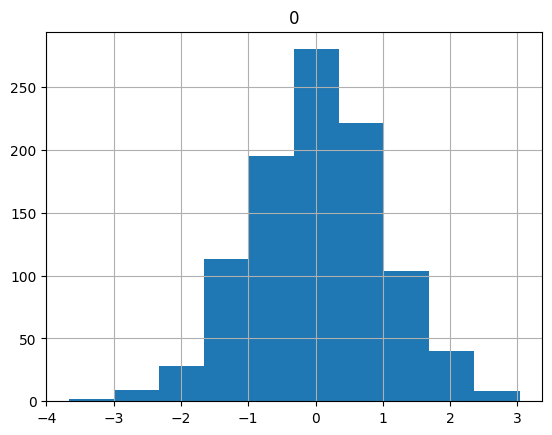

In [106]:
df.hist()

In [108]:
df = df.sort_values(0)

In [109]:
df

,0
848,-3.667520
691,-3.073892
416,-2.928459
665,-2.773190
938,-2.613650
...,...
517,2.477952
868,2.504588
770,2.517368
578,2.549886


In [110]:
df["cnt"] = range(1,1001)

In [112]:
df["pct"] = df["cnt"] / 1000

In [113]:
df

,0,cnt,pct
848,-3.667520,1,0.001
691,-3.073892,2,0.002
416,-2.928459,3,0.003
665,-2.773190,4,0.004
938,-2.613650,5,0.005
...,...,...,...
517,2.477952,996,0.996
868,2.504588,997,0.997
770,2.517368,998,0.998
578,2.549886,999,0.999


<Axes: >

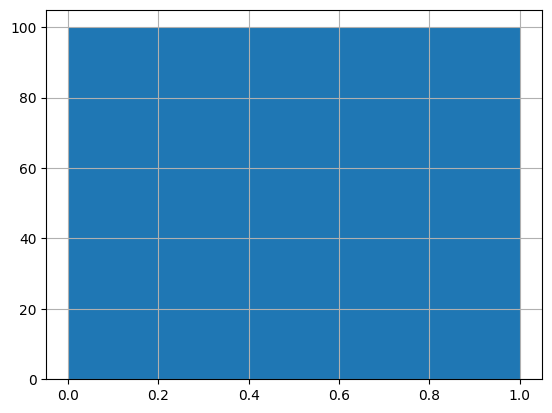

In [114]:
df["pct"].hist()

In [120]:
df["bin"] = pd.cut(df["pct"], 10)

In [121]:
df.groupby("bin")["pct"].count()

bin
(1e-06, 0.101]    100
(0.101, 0.201]    100
(0.201, 0.301]    100
(0.301, 0.401]    100
(0.401, 0.5]      100
(0.5, 0.6]        100
(0.6, 0.7]        100
(0.7, 0.8]        100
(0.8, 0.9]        100
(0.9, 1.0]        100
Name: pct, dtype: int64